In [40]:
# importing the librariers needed to execute the process

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import random
from numpy import inf
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import expon
from scipy.stats import poisson
from scipy.stats import binom
import time

import pandas as pd



In [47]:
# the below function is to Visulaise the Matrix and the shortest path 

class solvingMaze:
    
    def showmatrix(self, numberofRows):
        self.numberofRows = numberofRows
        
        #data = np.random.seed(numberofRows)
        data = np.random.randint(numberofRows, size = (numberofRows,numberofRows))
        #Keep the numbers constant

        print("visualize matrix with Random Number",data)
        fig, ax = plt.subplots()
        # Using matshow here just because it sets the ticks up nicely. imshow is faster.
        ax.matshow(data, cmap=mpl.colors.ListedColormap(['white','grey',"silver"]))

        for (i, j), z in np.ndenumerate(data):
            ax.text(j, i, '{:d}'.format(z), ha='center', va='center')

        plt.show()
        return data, numberofRows
   

    def visualizepath(self, path):
        fig, ax = plt.subplots()
        # Using matshow here just because it sets the ticks up nicely. imshow is faster.
        ax.matshow(path, cmap=mpl.colors.ListedColormap(['white','grey']))

        for (i, j), z in np.ndenumerate(path):
            ax.text(j, i, '{:d}'.format(z), ha='center', va='center')

        plt.show()



In [46]:


# there are two game modes to the executing the program to find the shortest path 
# Assumption - Game starts from 1,1 and destination is n,n 
# Game Mode 1 : The time spent on a cell is the number on x, y cell
# Game Mode 2: The time spent on a cell is the absolute of the difference between the previous cell the 
# agent was on and the current cell it is on 



# Below logic is for Heuristic Algorithm


class Heuristic:
    def heuristicpath(self,data,numberofRows,modeofGame):
        ti = time.time()
        

        path = np.zeros((numberofRows,numberofRows), dtype = np.int8)
        x,y = (0,0)

        cost = 0
        # we cover 2n-1 cell
        if modeofGame == 1:
            for i in range((2 * numberofRows) - 1):
                path[x][y] = 1
                cost = cost + data[x][y]
                if x < numberofRows - 1  and y < numberofRows - 1 :  
                    if abs(data[x + 1][y]) <= abs(data[x][y + 1]):
                        x = x + 1
                    else :
                        y = y + 1
                elif x == numberofRows - 1 and y != numberofRows - 1 :
                        y = y + 1

                elif y == numberofRows - 1 and x != numberofRows -1 :
                        x = x + 1
        else:
            for i in range(2 * numberofRows -1 ):
                path[x][y] = 1
                xpre = x
                ypre = y
                if x < numberofRows - 1  and y < numberofRows - 1 :
                    if abs(data[x + 1][y]  - data[x][y]) <= abs(data[x][y + 1] - data[x][y]):
                        x = x + 1
                    else :
                        y = y + 1
                elif x == numberofRows - 1 and y != numberofRows - 1:
                        y = y + 1

                elif y == numberofRows- 1 and x != numberofRows - 1 :
                        x = x + 1
                cost = cost + abs(data[xpre][ypre] - data[x][y])

                    
        tf = time.time()
        return path,cost,round(1000*(tf-ti),2)
        
    

In [48]:
# Below logic is for Dijikstra Algorithm for both the game modes mentioned above

class Dijikstra: 
    
    def dijkstrapath(self , matrixcomponent, numberofRows,modeofGame):
            ti = time.time()
            graph = {}
            matrix = matrixcomponent
            costs = {}
            if modeofGame == 1:
                for x in range(numberofRows):
                    for y in range(numberofRows):
                            xm1 = x - 1
                            ym1 = y - 1
                            xp1 = x + 1
                            yp1 = y + 1
                            costs[str(x) + str(y)] = inf
                            graph[str(x) + str(y)] = {}
                            above = np.array((xm1, y)) if xm1 >= 0 else np.array((np.nan,np.nan))
                            if np.isnan(above[0]) == False:
                                graph[str(x) + str(y)][str(xm1) + str(y)] = matrix[xm1][y]
                            below = np.array((xp1, y)) if xp1 < numberofRows else np.array((np.nan,np.nan))
                            if np.isnan(below[0]) == False:
                                graph[str(x) + str(y)][str(xp1) + str(y)] = matrix[xp1][y]
                            left = np.array((x, ym1)) if ym1 >= 0 else np.array((np.nan,np.nan))
                            if np.isnan(left[0]) == False :
                                graph[str(x) + str(y)][str(x) + str(ym1)] = matrix[x][ym1]
                            right = np.array((x, yp1)) if yp1 < numberofRows else np.array((np.nan,np.nan))
                            if np.isnan(right[0]) == False:
                                graph[str(x) + str(y)][str(x) + str(yp1)] = matrix[x][yp1]
            else:
                for x in range(numberofRows):
                    for y in range(numberofRows):
                            xm1 = x - 1
                            ym1 = y - 1
                            xp1 = x + 1
                            yp1 = y + 1
                            costs[str(x) + str(y)] = inf
                            graph[str(x) + str(y)] = {}
                            above = np.array((xm1, y)) if xm1 >= 0 else np.array((np.nan,np.nan))
                            if np.isnan(above[0]) == False:
                                graph[str(x) + str(y)][str(xm1) + str(y)] = abs(matrix[xm1][y] - matrix[x][y])
                            below = np.array((xp1, y)) if xp1 < numberofRows else np.array((np.nan,np.nan))
                            if np.isnan(below[0]) == False:
                                graph[str(x) + str(y)][str(xp1) + str(y)] = abs(matrix[xp1][y]  - matrix[x][y])
                            left = np.array((x, ym1)) if ym1 >= 0 else np.array((np.nan,np.nan))
                            if np.isnan(left[0]) == False :
                                graph[str(x) + str(y)][str(x) + str(ym1)] = abs(matrix[x][ym1] - matrix[x][y])
                            right = np.array((x, yp1)) if yp1 < numberofRows else np.array((np.nan,np.nan))
                            if np.isnan(right[0]) == False:
                                graph[str(x) + str(y)][str(x) + str(yp1)] =abs(matrix[x][yp1] - matrix[x][y])


            costs["00"] = matrix[0][0]
            #print(graph)
            destination = str(numberofRows - 1) + str(numberofRows - 1)
            parents = {}
            result = {}
            result = self.search('00',destination , graph, costs, parents)
            

            
            #print('parent dictionary={}'.format(result))
            spath =self.backpedal('00', destination, result)
            #print('Shortest path={}'.format(self.backpedal('00',destination, result)))   
            path = np.zeros((numberofRows,numberofRows), dtype = np.int8)
            for choosen in spath:
                    path[int(choosen[0])][int(choosen[1])] = 1
            cost = 0
            if modeofGame == 1:
                for choosen in spath:
                    cost = cost + matrix[int(choosen[0])][int(choosen[1])]
            else:
                for i in range(len(spath) - 1):
                    cost=cost+abs(matrix[int(spath[i][0])][int(spath[i][1])]-matrix[int(spath[i+1][0])][int(spath[i+1][1])])
                
           
            tf = time.time()
            return path,cost,round(1000*(tf-ti),2)


            
# Forward propogation logic to find the shortest path

    def search(self,source, target, graph, costs, parents):

        nextNode = source
        #print(source)

        while nextNode != target:

            for neighbor in graph[nextNode]:

                if graph[nextNode][neighbor] + costs[nextNode] < costs[neighbor]:

                    costs[neighbor] = graph[nextNode][neighbor] + costs[nextNode]

                    parents[neighbor] = nextNode

                del graph[neighbor][nextNode]

            del costs[nextNode]

            nextNode = min(costs, key=costs.get)
        
        return parents

# Back Pedal logic to backtrack the path
   
    def backpedal(self,source, target, searchResult):

        node = target

        backpath = [target]

        path = []

        while node != source:

            backpath.append(searchResult[node])

            node = searchResult[node]

        for i in range(len(backpath)):

            path.append(backpath[-i - 1])

        return path


Enter the size of the Matrix 5
Choose the Algorithm mode , Enter 1 for Heuristic Algorithm or 2 for dijikstra's to select1
Choose the game mode , Enter 1 or 2 to select1


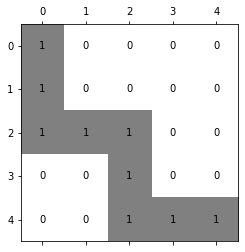

33


In [70]:
OBJ = solvingMaze()
numberofRows = int(input("Enter the size of the Matrix "))
matrixcomponent = np.array([[1,9,1,1,1],
                              [1,9,1,9,1],
                              [1,1,1,9,1],
                              [9,9,9,9,1],
                              [9,9,9,9,1]])
selectOfAlgorithm = int(input("Choose the Algorithm mode , Enter 1 for Heuristic Algorithm or 2 for dijikstra's to select"))
modeofGame = int(input("Choose the game mode , Enter 1 or 2 to select"))
#cost = 0
#path = np.zeros((numberofRows,numberofRows), dtype = np.int8)

if selectOfAlgorithm == 1:                   
        hr = Heuristic()
        result = hr.heuristicpath(matrixcomponent , numberofRows,modeofGame)
        path , cost, tm = result
        
else:
        modeofGame =Dijikstra()
        result = modeofGame.dijkstrapath(matrixcomponent,numberofRows,modeofGame)
        path, cost, tm = result
OBJ.visualizepath(path)
print(cost)
                  




In [71]:
## Plotting of Heuristic and Dijikstra Alogrithm based on the game modes for different criterias and analyse the result

## 1. Cost Vs Size of Matrix

## 2. Cost difference Vs Size of Matrix

## 3. Time difference Vs Size of Matrix
class statistical_analysis:
    def costVSsizeofMatrix(self,distribution,n):

        heuristic = Heuristic()
        dijkstra = Dijikstra()
        cellheuristic = [[],[]]
        celldijkstra = [[],[]]
        costheuristic = [[],[]]
        costdijkstra = [[],[]]
        timeheuristic = [[],[]]
        timedijkstra = [[],[]]
        costdifference = [[],[]]
        celldifference = [[],[]]
        timedifference = [[],[]]
        for mode in range(2):
            for i in range(1,n):
                if distribution == "random":
                     data = np.random.randint(i, size = (i,i))
                if distribution == "uniform":
                    data = uniform.rvs(size=(i,i), loc = 1, scale= 10)
                if distribution == "normal":
                    data = uniform.rvs(size=(i,i), loc = 1, scale=20)
                if distribution == "gamma":
                    data = gamma.rvs(a=5, size=(i,i))
                if distribution == "exponential":
                    data = expon.rvs(scale=1,loc=0,size=(i,i))
                if distribution == "poisson":
                    data = poisson.rvs(mu=3, size=(i,i))
                if distribution == "binomial":
                    data = binom.rvs(n=10,p=0.8,size=(i,i))
                
                ph,ch,th = heuristic.heuristicpath(data, i,mode + 1)
                #ph,ch = heuristic.heuristicpath(data, i,mode + 1)
                
                
                pd,cd,td = dijkstra.dijkstrapath(data,i,mode + 1)
                cellheuristic[mode].append(np.sum(ph))
                celldijkstra[mode].append(np.sum(pd))
                costheuristic[mode].append(ch)
                costdijkstra[mode].append(cd)
                timeheuristic[mode].append(th)
                timedijkstra[mode].append(td)
                costdifference[mode].append(ch - cd)
                celldifference[mode].append(abs(np.sum(ph) - np.sum(pd)))
                timedifference[mode].append(abs(th - td))
           
            
            if mode == 0:
                print("Heuristic algorithm & Dijkstra algorithm cost VS the size of matrix for ",distribution + " distribution.")  
            print("For game mode :",mode + 1)
            plt.figure(figsize=(8,8))    
            plt.plot(range(1,n),costheuristic[mode], label = "heuristic")
            plt.plot(range(1,n),costdijkstra[mode], label = "dijkstra")
            plt.xlabel('Size of maze')
            plt.ylabel('Cost')
            plt.legend()
            plt.show()
            
            
            if mode == 0:
                print("Heuristic algorithm & Dijkstra algorithm costdifference VS the size of matrix for ",distribution + " distribution.")  
            print("For game mode :",mode + 1)
            plt.figure(figsize=(8,8))    
            plt.plot(range(1,n),costdifference[mode])
            plt.xlabel('Size of maze')
            plt.ylabel('Costdifference between heuristic and dijkstra algorithms')
           
            plt.show()
            
            if mode == 100:
            
                if mode == 0:
                    print("Heuristic algorithm & Dijkstra algorithm timedifference VS the size of matrix for ",distribution + " distribution.")  
                print("For game mode :",mode + 1)
                plt.figure(figsize=(8,8))    
                plt.plot(range(1,n),timedifference[mode])
                plt.xlabel('Size of maze')
                plt.ylabel('timedifference between heuristic and dijkstra algorithms')

                plt.show()

                if mode == 0:
                    print("Heuristic algorithm & Dijkstra algorithm celldifference VS the size of matrix for ",distribution + " distribution.")  
                print("For game mode :",mode + 1)
                plt.figure(figsize=(8,8))    
                plt.plot(range(1,n),celldifference[mode])
                plt.xlabel('Size of maze')
                plt.ylabel('celldifference between heuristic and dijkstra algorithms')

                plt.show()
        
        
        return cellheuristic,celldijkstra ,costheuristic ,costdijkstra,timeheuristic ,timedijkstra ,costdifference ,celldifference ,timedifference
            
            
            
            

   





In [72]:
costheuristic = [[],[]]
costdijkstra =  [[],[]]
costdifference = [[],[]]

class unvscost:
    def unanalysisonrange(self,n_of_i):
        data = uniform.rvs(size=(5,5), loc = 0, scale= 5*(i+1))
        plotdistribution(data_distribution,"UNIFORM Distribution")
    def unstdvariance(self, n_of_i):
        data_distribution = uniform.rvs(size=(5,5), loc = 0, scale= 10)
        plotdistribution(data_distribution,"UNIFORM Distribution")

class gammavscost:            
    def gammastdvariance(self, n_of_i):
        data_distribution = gamma.rvs(a = i + 1, size=(5,5))
        plotdistribution(data_distribution,"Gamma Distribution")
class expvscost:            
    def expstdvariance(self, n_of_i):
        data_distribution = data = expon.rvs(scale=1,loc=0,size=(5,5))
        plotdistribution(data_distribution,"Exponential Distribution")
            
class poissonvscost:            
    def poissonstdvariance(self, n_of_i):
        data_distribution = poisson.rvs(mu=3, size=(5,5))
        plotdistribution(data_distribution,"Poisson Distribution")
                   
class binomvscost:            
    def binomstdvariance(self, n_of_i):
        data_distribution = binom.rvs(n=10,p=0.8,size=(5,5))
        plotdistribution(data_distribution,"BINOMIAL Distribution")
    

In [60]:

class Distributionplotting:
    def plotdistribution(self,data_distribution,distributionName):
        heuristic = Heuristic()
        dijkstra = Dijikstra()
        costheuristic = [[],[]]
        costdijkstra =  [[],[]]
        costdifference = [[],[]]
        for mode in range(2):
            for i in range(n_of_i):
                data = uniform.rvs(size=(5,5), loc = 0, scale= 5*(i+1))
                ph,ch,th = heuristic.heuristicpath(data, 5,mode + 1)
                pd,cd,td = dijkstra.dijkstrapath(data,5,mode + 1)
                costheuristic[mode].append(ch)
                costdijkstra[mode].append(cd)
                costdifference[mode].append(ch - cd)
            if mode == 0:
                print("Heuristic algorithm & Dijkstra algorithm cost for uniform distribution.")  
            print("For game mode :",mode + 1)
            plt.figure(figsize=(10,8))    
            plt.plot(range(0,n_of_i),costheuristic[mode], label = "heuristic")
            plt.plot(range(0,n_of_i),costdijkstra[mode], label = "dijkstra")
            plt.xticks(range(0,n_of_i))
            plt.xlabel('Number of iterations')
            plt.ylabel('Cost')
            
            plt.legend()
            plt.show()



    def plotstdvariancedistribution(self,data_distribution,distributionName):
        heuristic = Heuristic()
        dijkstra = Dijikstra()
        costheuristic = [[],[]]
        costdijkstra =  [[],[]]
        costdifference = [[],[]]
        stdvh = [[],[]]
        meanh = [[],[]]
        varh = [[],[]]
        stdvd = [[],[]]
        meand = [[],[]]
        vard = [[],[]]
        for mode in range(2):
            for i in range(n_of_i):
                #data = gamma.rvs(a = i + 1, size=(5,5))
                data = data_distribution
                ph,ch,th = heuristic.heuristicpath(data, 5,mode + 1)
                pd,cd,td = dijkstra.dijkstrapath(data,5,mode + 1)
                costheuristic[mode].append(ch)
                costdijkstra[mode].append(cd)
                costdifference[mode].append(ch - cd)

            if mode == 0:
                print("Heuristic algorithm & Dijkstra algorithm cost for gamma distribution.") 
                stdvh[mode] = np.std(costheuristic[mode])
                meanh[mode] = np.mean(costheuristic[mode])
                varh[mode] = np.var(costheuristic[mode])
                stdvd[mode] = np.std(costdijkstra[mode])
                meand[mode] = np.mean(costdijkstra[mode])
                vard[mode] = np.var(costdijkstra[mode])
            else:
                stdvh[mode] = np.std(costheuristic[mode])
                meanh[mode] = np.mean(costheuristic[mode])
                varh[mode] = np.var(costheuristic[mode])
                stdvd[mode] = np.std(costdijkstra[mode])
                meand[mode] = np.mean(costdijkstra[mode])
                vard[mode] = np.var(costdijkstra[mode])
        print("For game mode :",mode + 1)
        print("For heuristic:")
        print("Mean of cost is ", meanh[mode], " Standard deviation is ", stdvh[mode], " Variance is ", varh[mode])
        print("For dijkstra:")
        print("Mean of cost is ", meand[mode], " Standard deviation is ", stdvd[mode], " Variance is ", vard[mode])
        plt.figure(figsize=(10,8))    
        plt.plot(range(0,n_of_i),costheuristic[mode], label = "heuristic")
        plt.plot(range(0,n_of_i),costdijkstra[mode], label = "dijkstra")
        plt.xticks(range(0,n_of_i))
        plt.xlabel('Number of iterations')
        plt.ylabel('Cost')

        plt.legend()
        plt.show()


In [36]:
untable[0][0]

NameError: name 'untable' is not defined

## Size of the matrix vs cost on different distribution

Heuristic algorithm & Dijkstra algorithm cost VS the size of matrix for  random distribution.
For game mode : 1


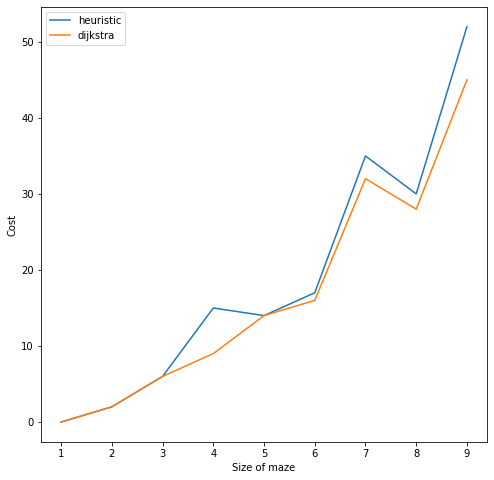

Heuristic algorithm & Dijkstra algorithm costdifference VS the size of matrix for  random distribution.
For game mode : 1


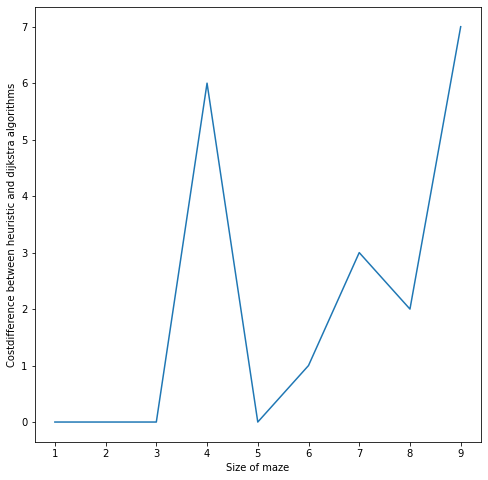

For game mode : 2


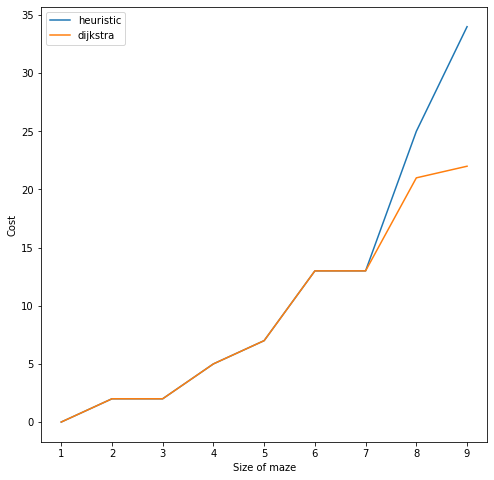

For game mode : 2


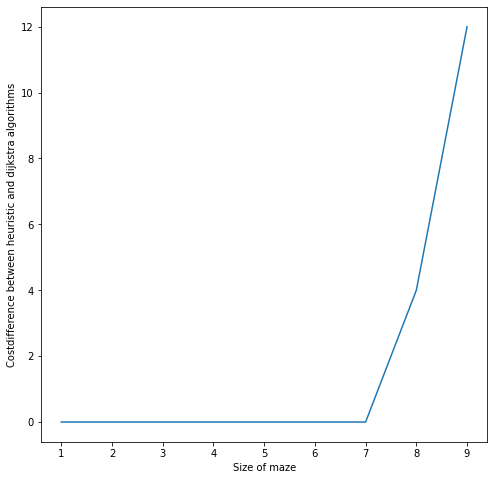

Heuristic algorithm & Dijkstra algorithm cost VS the size of matrix for  gamma distribution.
For game mode : 1


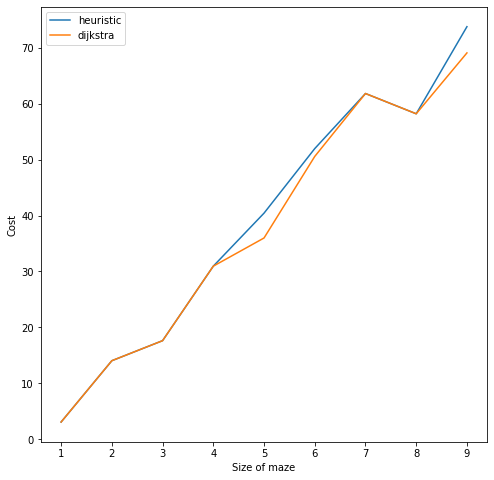

Heuristic algorithm & Dijkstra algorithm costdifference VS the size of matrix for  gamma distribution.
For game mode : 1


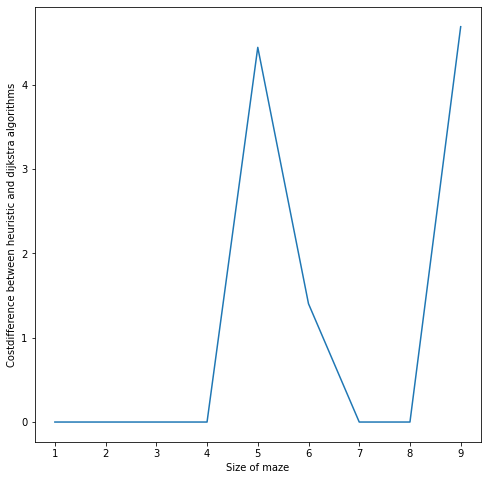

For game mode : 2


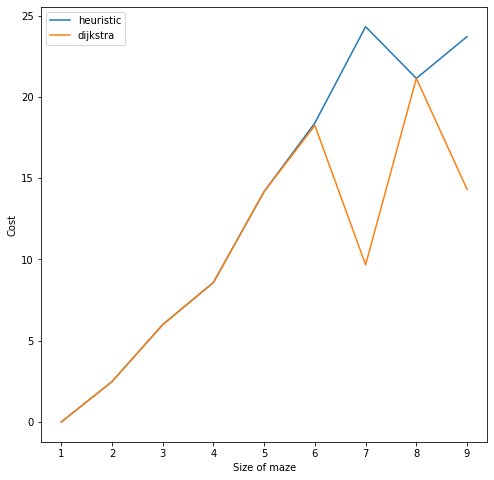

For game mode : 2


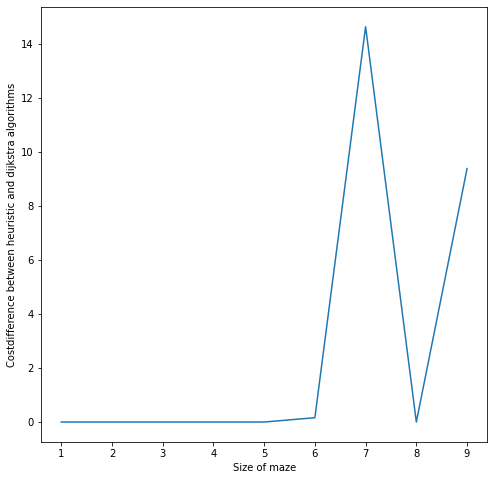

Heuristic algorithm & Dijkstra algorithm cost VS the size of matrix for  exponential distribution.
For game mode : 1


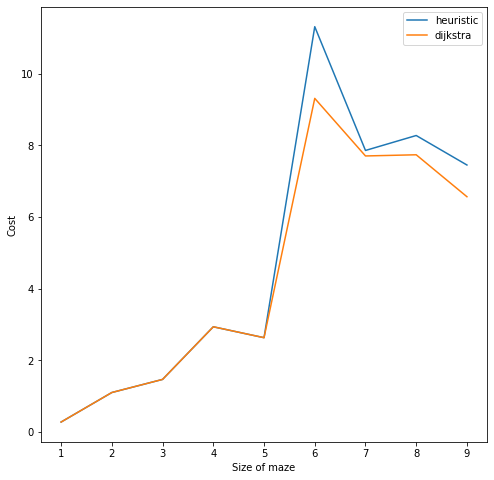

Heuristic algorithm & Dijkstra algorithm costdifference VS the size of matrix for  exponential distribution.
For game mode : 1


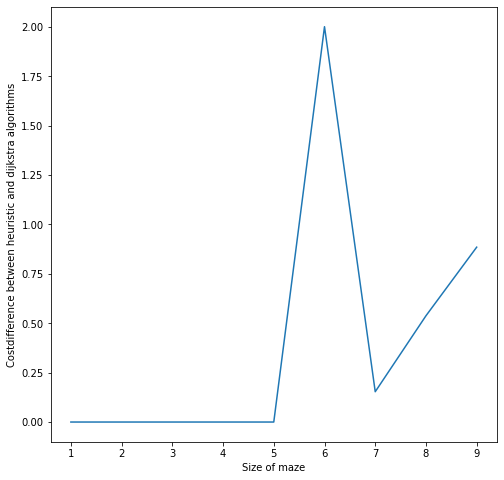

For game mode : 2


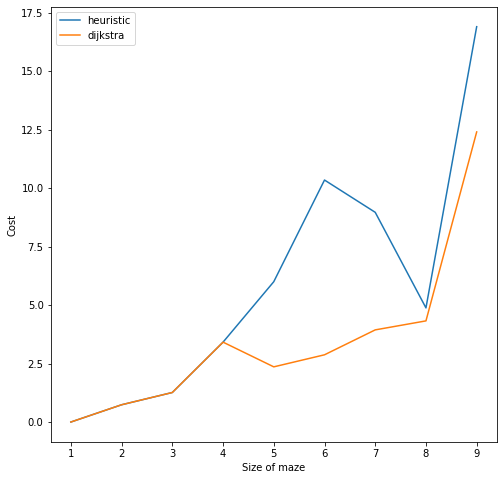

For game mode : 2


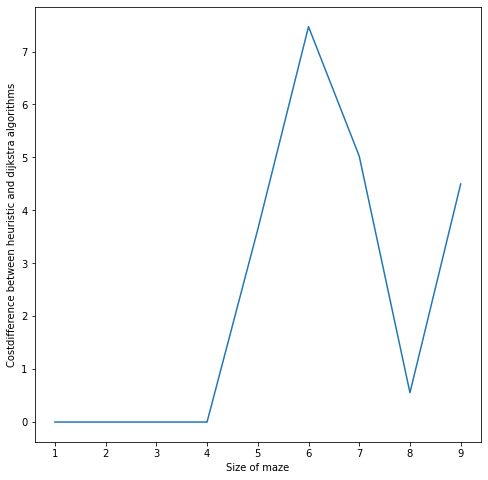

([[1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 3, 5, 7, 9, 11, 13, 15, 17]], [[1, 3, 5, 7, 9, 11, 13, 15, 17], [1, 3, 5, 7, 9, 11, 13, 15, 17]], [[0, 2, 6, 15, 14, 17, 35, 30, 52], [0, 2, 2, 5, 7, 13, 13, 25, 34]], [[0, 2, 6, 9, 14, 16, 32, 28, 45], [0, 2, 2, 5, 7, 13, 13, 21, 22]], [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.01, 0.0, 0.0]], [[0.0, 1.0, 0.0, 1.0, 1.99, 2.99, 3.99, 4.99, 9.97], [0.0, 0.0, 1.0, 2.06, 2.93, 3.83, 5.98, 9.97, 16.95]], [[0, 0, 0, 6, 0, 1, 3, 2, 7], [0, 0, 0, 0, 0, 0, 0, 4, 12]], [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0.0, 1.0, 0.0, 1.0, 1.99, 2.99, 3.99, 4.99, 9.97], [0.0, 0.0, 1.0, 2.06, 2.93, 3.83, 4.970000000000001, 9.97, 16.95]])


In [73]:
st = statistical_analysis()
#untable = st.costVSsizeofMatrix("uniform",10)
rantable = st.costVSsizeofMatrix("random",10)
#st.costVSsizeofMatrix("uniform",10)
st.costVSsizeofMatrix("gamma",10)
#st.costVSsizeofMatrix("poisson",10)
st.costVSsizeofMatrix("exponential",10)
#st.costVSsizeofMatrix("binomial",10)

print(rantable)

## Table for random genrated numbers for game mode 1

In [75]:
undf = pd.DataFrame({"Cellheuristic":rantable[0][0],"Celldijkstra":rantable[1][0] ,"Costheuristic":rantable[2][0] ,"Costdijkstra":rantable[3][0],"Timeheuristic":rantable[4][0] ,"Timedijkstra":rantable[5][0] ,"Costdifference":rantable[6][0] ,"Celldifference":rantable[7][0] ,"Timedifference":rantable[8][0]})
undf



### Analysis Game Mode 1
# Time taken by Dijkstra's is more than the time taken by Heuristic algroithm

# Why?


,Cellheuristic,Celldijkstra,Costheuristic,Costdijkstra,Timeheuristic,Timedijkstra,Costdifference,Celldifference,Timedifference
0,1,1,0,0,0.0,0.00,0,0,0.00
1,3,3,2,2,0.0,1.00,0,0,1.00
2,5,5,6,6,0.0,0.00,0,0,0.00
3,7,7,15,9,0.0,1.00,6,0,1.00
4,9,9,14,14,0.0,1.99,0,0,1.99
5,11,11,17,16,0.0,2.99,1,0,2.99
6,13,13,35,32,0.0,3.99,3,0,3.99
7,15,15,30,28,0.0,4.99,2,0,4.99
8,17,17,52,45,0.0,9.97,7,0,9.97


## Table for randomly generated numbers for game mode 2

In [76]:
undf = pd.DataFrame({"Cellheuristic":rantable[0][1],"Celldijkstra":rantable[1][1] ,"Costheuristic":rantable[2][1] ,"Costdijkstra":rantable[3][1],"Timeheuristic":rantable[4][1] ,"Timedijkstra":rantable[5][1] ,"Costdifference":rantable[6][1] ,"Celldifference":rantable[7][1] ,"Timedifference":rantable[8][1]})
undf

,Cellheuristic,Celldijkstra,Costheuristic,Costdijkstra,Timeheuristic,Timedijkstra,Costdifference,Celldifference,Timedifference
0,1,1,0,0,0.00,0.00,0,0,0.00
1,3,3,2,2,0.00,0.00,0,0,0.00
2,5,5,2,2,0.00,1.00,0,0,1.00
3,7,7,5,5,0.00,2.06,0,0,2.06
4,9,9,7,7,0.00,2.93,0,0,2.93
5,11,11,13,13,0.00,3.83,0,0,3.83
6,13,13,13,13,1.01,5.98,0,0,4.97
7,15,15,25,21,0.00,9.97,4,0,9.97
8,17,17,34,22,0.00,16.95,12,0,16.95


In [62]:
und = unvscost()
und.unanalysisonrange(20)


NameError: name 'i' is not defined

In [63]:
und = unvscost()
und.unstdvariance(20)

NameError: name 'plotdistribution' is not defined

In [13]:
lst = []
lst = [1,2,3,4]
np.std(lst)

1.118033988749895

Heuristic algorithm & Dijkstra algorithm cost for gamma distribution.
For game mode : 1
For heuristic:
Mean of cost is  81.81931819319217  Standard deviation is  47.46544958641368  Variance is  2252.968904440379
For dijkstra:
Mean of cost is  80.05352185676314  Standard deviation is  46.8337103298943  Variance is  2193.396423264448
For game mode : 2
For heuristic:
Mean of cost is  17.535194971472745  Standard deviation is  8.47123504478602  Variance is  71.76182318401082
For dijkstra:
Mean of cost is  14.536340308390063  Standard deviation is  6.747209885764311  Variance is  45.524841242555645


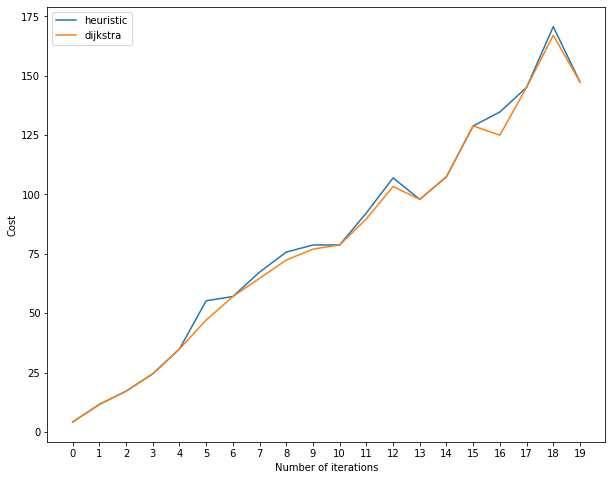

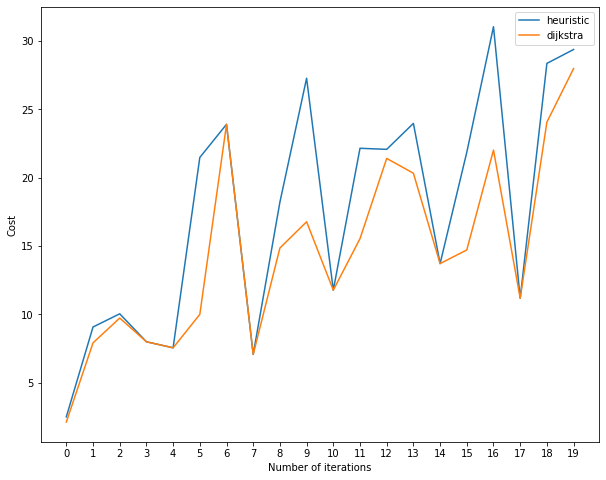

In [30]:
gmd = gammavscost()
gmd.gammastdvariance(20)

Heuristic algorithm & Dijkstra algorithm cost for gamma distribution.
For game mode : 1
For heuristic:
Mean of cost is  6.610760981044438  Standard deviation is  2.423116267769523  Variance is  5.8714924471293015
For dijkstra:
Mean of cost is  5.318236590929856  Standard deviation is  1.8948120150417533  Variance is  3.5903125723465896


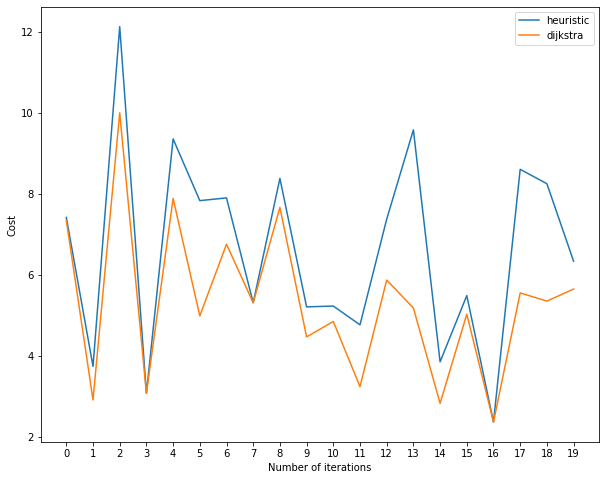

For game mode : 2
For heuristic:
Mean of cost is  4.780611445341805  Standard deviation is  1.960977704566357  Variance is  3.8454335578063388
For dijkstra:
Mean of cost is  3.563351950731659  Standard deviation is  1.8015425627521475  Variance is  3.2455556054075756


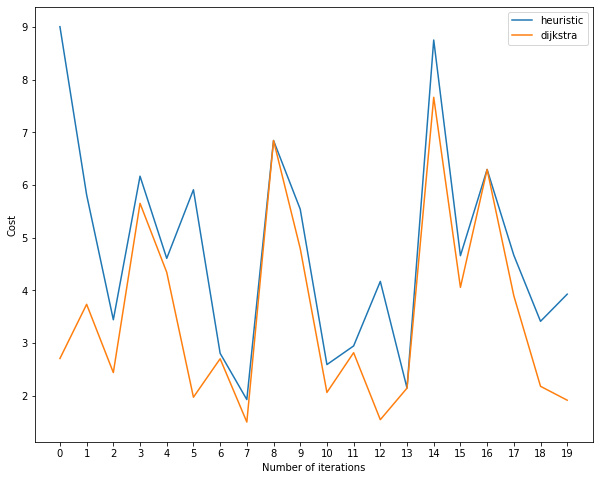

In [24]:
exp = expvscost()
exp.expstdvariance(20)

In [44]:
poisson = poissonvscost()
poisson.poissonstdvariance(20)

AttributeError: 'poissonvscost' object has no attribute 'rvs'

In [45]:
binom = binomvscost()
binom.binomstdvariance(20)

AttributeError: 'binomvscost' object has no attribute 'rvs'